## Plot the generated daily soil and runoff cation concentrations

In [1]:
import os
import xarray as xr
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from shared_read_HBR import *
from matplotlib import rcParams

rcParams['font.size'] = 14
rcParams['axes.titlesize'] = 14

#folder = 'ERW_20240310_HBR_1_ICB20TRCNPRDCTCBC'
folder = 'ERW_HBR_1_ICB1850CNRDCTCBC_ad_spinup'
#folder = 'ERW_20231110_UC_Davis_ICB20TRCNPRDCTCBC'
#folder = 'ERW_UC_Davis_ICB1850CNRDCTCBC_ad_spinup'

In [2]:
path_to_files = os.path.join(os.environ['PROJDIR'], 'E3SM', 'output', folder, 'run')
if '1850' in folder:
    # ncrcat ERW_HBR_1_ICB1850CNRDCTCBC_ad_spinup.elm.h2.00*.nc output.nc
    #hr = xr.open_mfdataset(glob(os.path.join(path_to_files, 'output.nc')))
    hr = xr.open_mfdataset(glob(os.path.join(path_to_files, '*.elm.h2.*.nc')))
    tvec = [pd.Timestamp(year=t.year + 2000, month=t.month, day=t.day) for t in hr['time'].values]
else:
    hr = xr.open_mfdataset(glob(os.path.join(path_to_files, '*.elm.h1.*.nc')))
    tvec = [pd.Timestamp(year=t.year, month=t.month, day=t.day) for t in hr['time'].values]

## 1. Background weathering rates

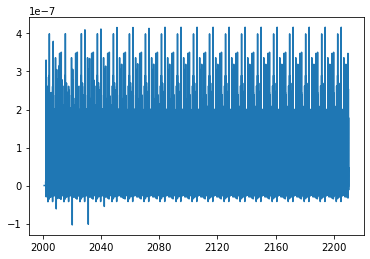

In [3]:
plt.plot(tvec, hr['background_weathering'][:, 0,0])

## 2. Primary mineral content and dissolution

(0.0, 1.0, 0.0, 1.0)

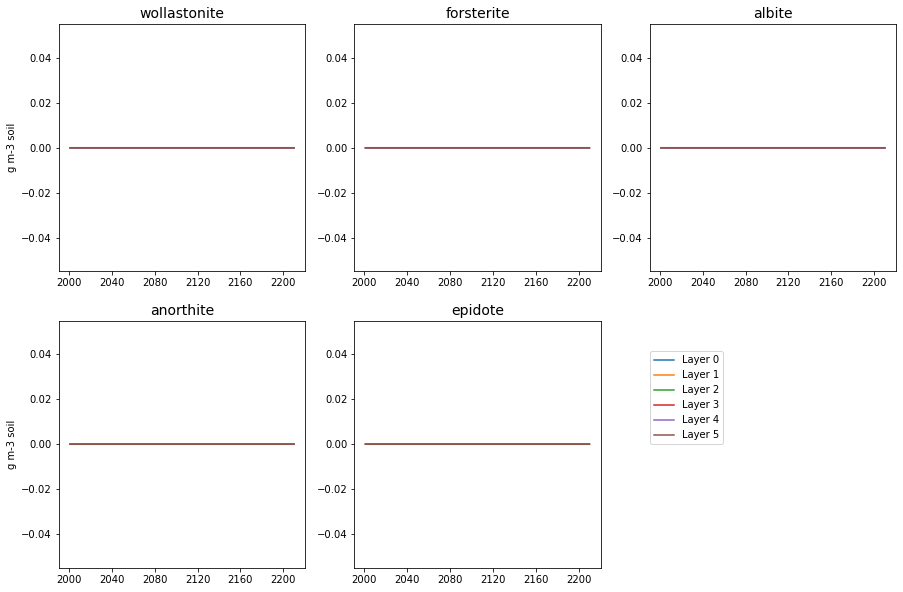

In [4]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['wollastonite', 'forsterite', 'albite', 'anorthite', 'epidote']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'primary_mineral_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
axes.flat[-1].axis('off')

<ipython-input-5-fcba1ebe3744>:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


(0.0, 1.0, 0.0, 1.0)

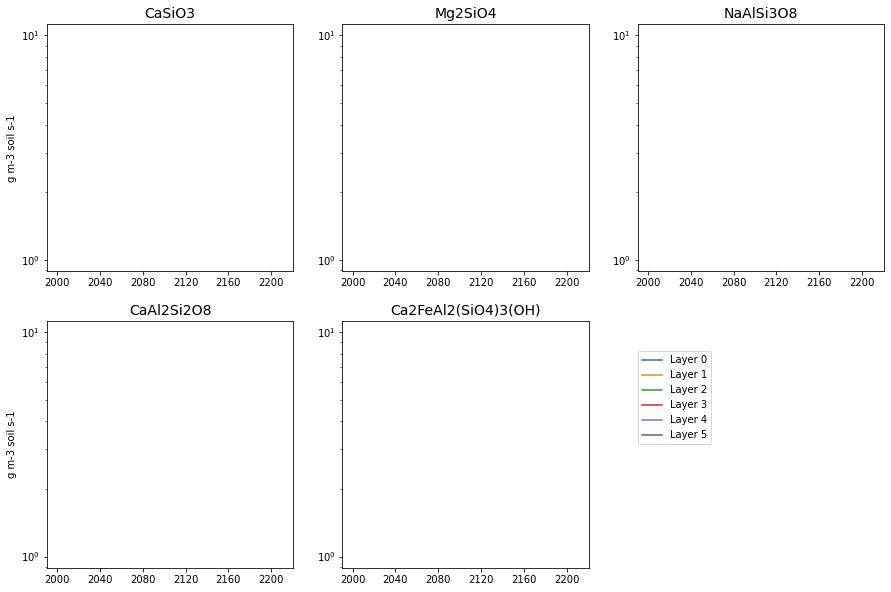

In [5]:
# rate of dissolution
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, min in enumerate(['CaSiO3', 'Mg2SiO4', 'NaAlSi3O8', 'CaAl2Si2O8', 'Ca2FeAl2(SiO4)3(OH)']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'primary_dissolve_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(min)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
    ax.set_yscale('log')
axes.flat[-1].axis('off')

<ipython-input-6-2ccfdc9e18f0>:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


(0.0, 1.0, 0.0, 1.0)

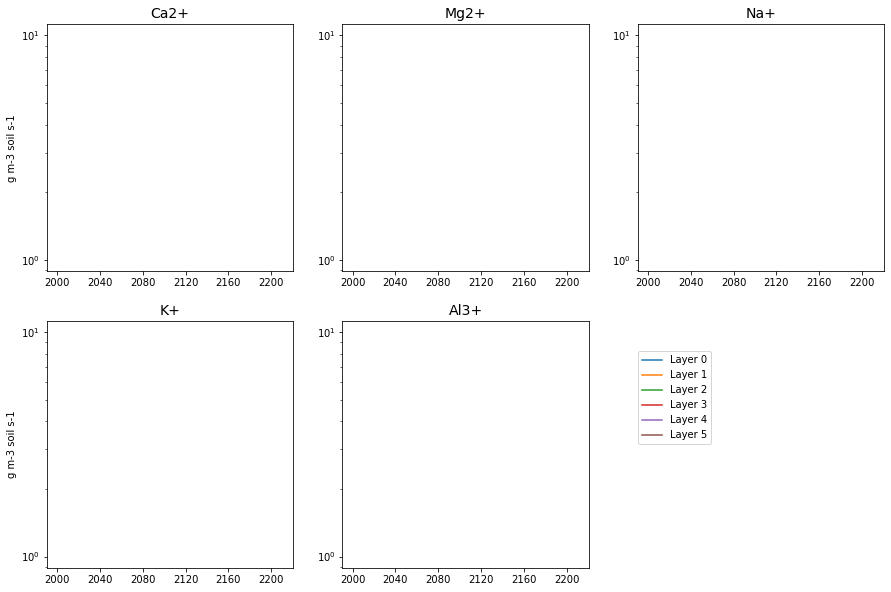

In [6]:
# rate of cation flux
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, min in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'primary_cation_flux_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(min)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
    ax.set_yscale('log')
axes.flat[-1].axis('off')

## 3. Rate of secondary mineral formation

<ipython-input-7-bea87464e5de>:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


(0.0, 1.0, 0.0, 1.0)

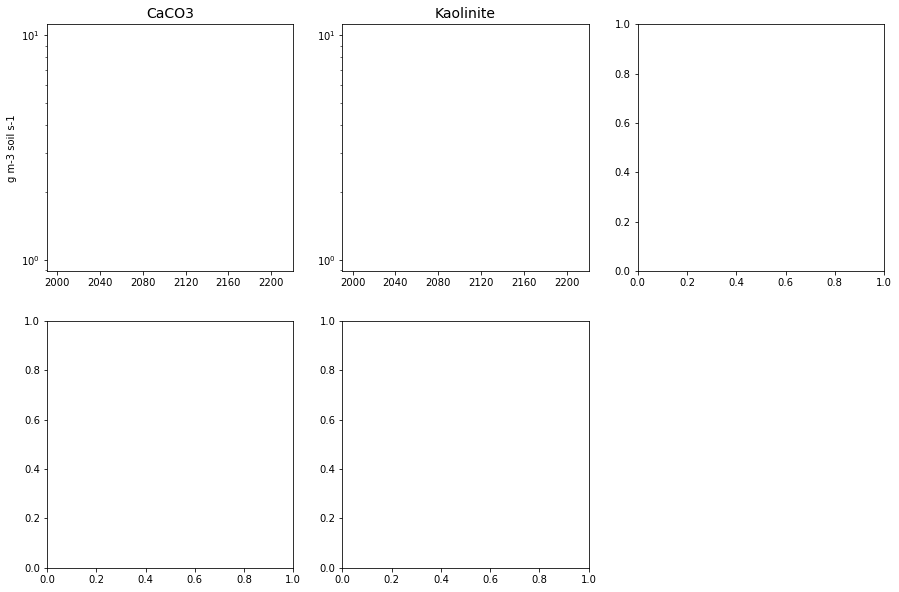

In [7]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, minsec in enumerate(['CaCO3', 'Kaolinite']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'r_precip_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(minsec)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
    ax.set_yscale('log')
axes.flat[-1].axis('off')

<ipython-input-8-b158282dc799>:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


(0.0, 1.0, 0.0, 1.0)

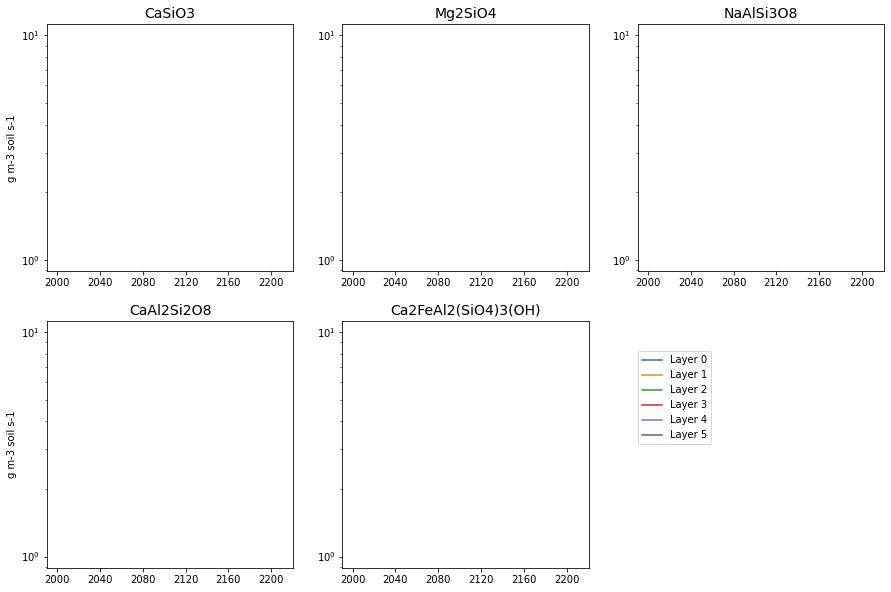

In [8]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, min in enumerate(['CaSiO3', 'Mg2SiO4', 'NaAlSi3O8', 'CaAl2Si2O8', 'Ca2FeAl2(SiO4)3(OH)']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'secondary_cation_flux_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(min)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
    ax.set_yscale('log')
axes.flat[-1].axis('off')

## 4. Cation exchange

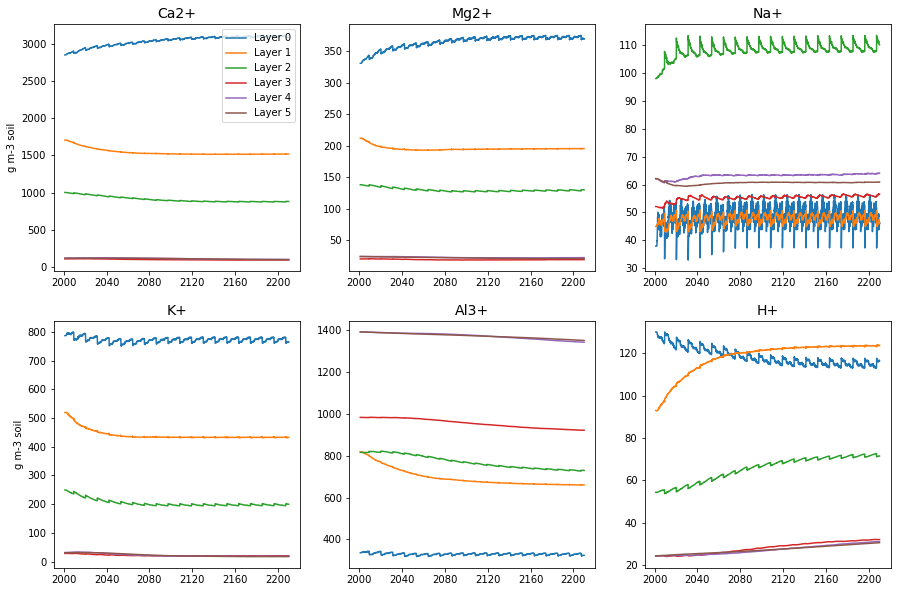

In [9]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'cec_cation_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 0:
        ax.legend()
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
ax = axes.flat[-1]
for layer in range(6):
    ax.plot(tvec, hr[f'cec_proton_vr'][:, layer, 0], label = f'Layer {layer}')
ax.set_title('H+')
fig.savefig('cec_cation_vr.png', dpi = 600)

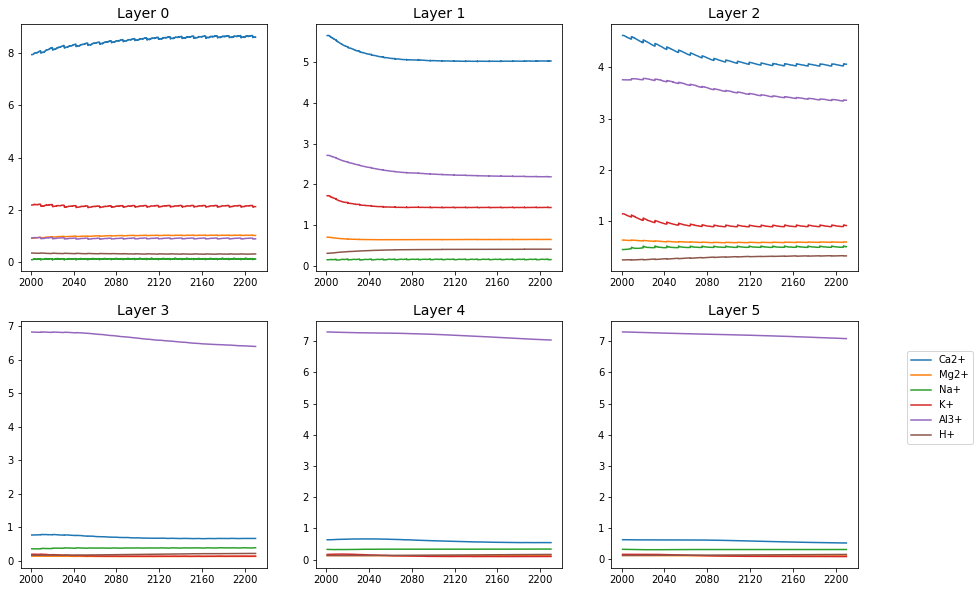

In [10]:
# convert from gram to percentage meq
valence_cation = [2,2,1,1,3]
mass_cation = [40.078, 24.305, 22.99, 39.0983, 26.98]

fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for layer in range(6):
    ax = axes.flat[layer]

    tot = hr[f'cec_proton_vr'][:, layer, 0]
    for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
        tot = tot + hr[f'cec_cation_vr_{i+1}'][:, layer, 0] / mass_cation[i] * valence_cation[i]

    for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
        ax.plot(tvec, hr[f'cec_cation_vr_{i+1}'][:, layer, 0]/tot, label = cation)
    ax.plot(tvec, hr[f'cec_proton_vr'][:, layer, 0]/tot, label = 'H+')

    ax.set_title(f'Layer {layer}')
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
ax.legend(loc = (1.2,0.5))
fig.savefig('cec_cation_vr_beta.png', dpi = 600)

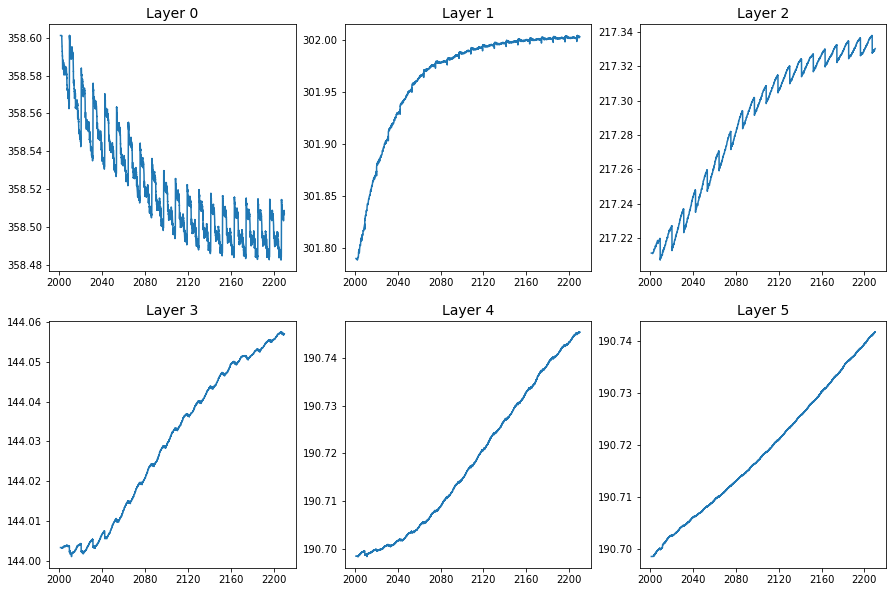

In [11]:
# check the charge balance
valence_cation = [2,2,1,1,3]
mass_cation = [40.078, 24.305, 22.99, 39.0983, 26.98]
fig, axes = plt.subplots(2, 3, figsize = (15, 10))

for layer in range(6):
    ax = axes.flat[layer]

    tot = hr[f'cec_proton_vr'][:, layer, 0].values
    for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
        tot = tot + hr[f'cec_cation_vr_{i+1}'][:, layer, 0].values / mass_cation[i] * valence_cation[i]

    ax.plot(tvec, tot)

    ax.set_title(f'Layer {layer}')

    if np.mod(i, 3) == 0:
        ax.set_ylabel('mol m-3 soil')
fig.savefig('cec_cation_vr_charge.png', dpi = 600)

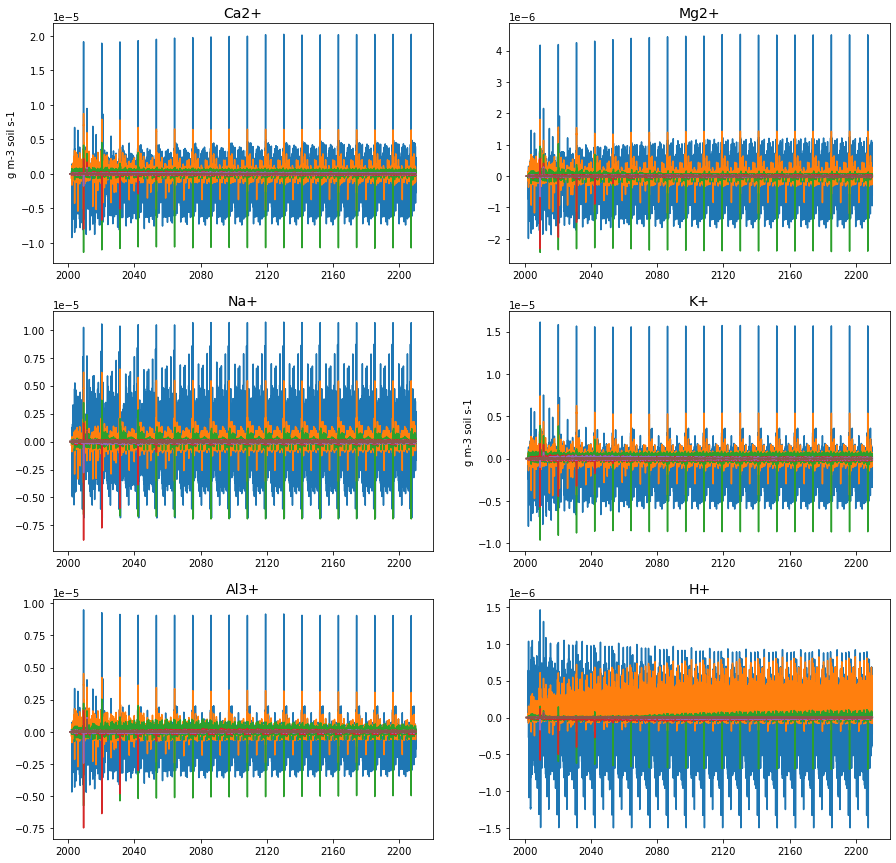

In [12]:
fig, axes = plt.subplots(3, 2, figsize = (15, 15))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'cec_cation_flux_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
ax = axes.flat[-1]
for layer in range(6):
    ax.plot(tvec, hr[f'cec_proton_flux_vr'][:, layer, 0], label = f'Layer {layer}')
ax.set_title('H+')
fig.savefig('cec_cation_flux_vr.png', dpi = 600)

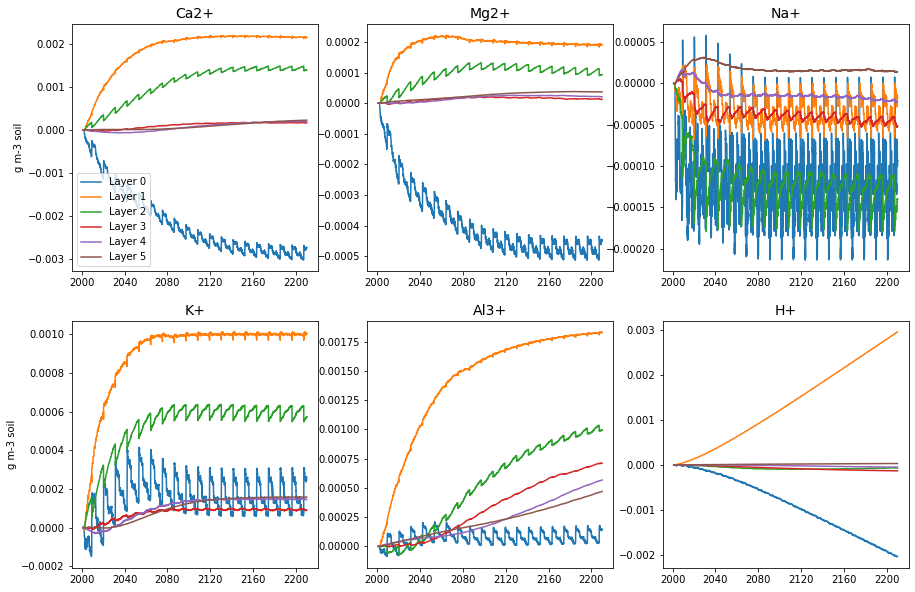

In [13]:
# CEC cation flux, cumulative
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        s = pd.Series(hr[f'cec_cation_flux_vr_{i+1}'][:, layer, 0].values,
                      index = tvec)
        s = s.cumsum()
        ax.plot(tvec, s, label = f'Layer {layer}')
    if i == 0:
        ax.legend()
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
ax = axes.flat[-1]
for layer in range(6):
    s = pd.Series(hr['cec_proton_flux_vr'][:, layer, 0].values, index = tvec)
    s = s.cumsum()
    ax.plot(tvec, s, label = f'Layer {layer}')
ax.set_title('H+')
fig.savefig('cec_cation_flux_vr_rolling.png', dpi = 600)

## 5. Cation in/out by infiltration, runoff and leaching

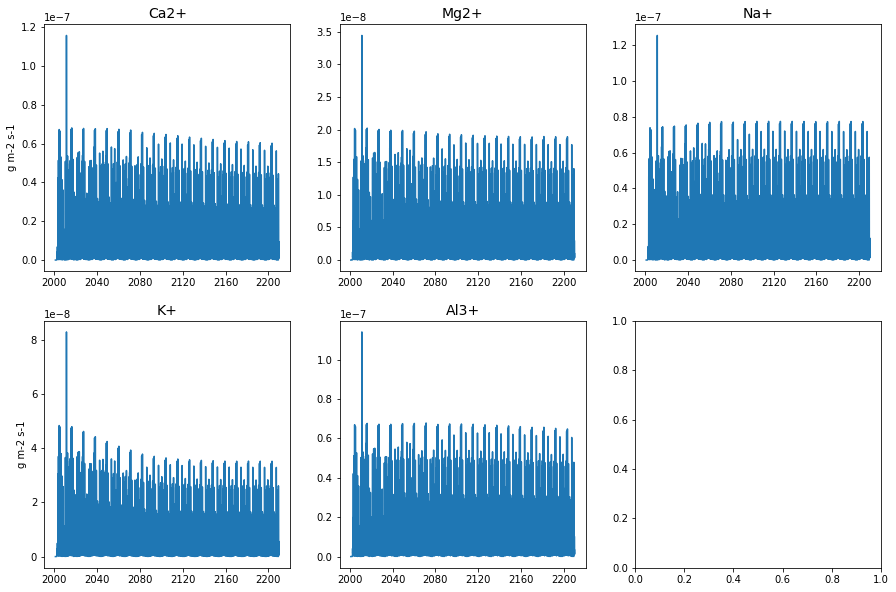

In [14]:
cation_export_sim = pd.DataFrame(
    hr['cation_leached'][:, :, 0] + hr['cation_runoff'][:, :, 0],
    index = tvec, columns = ['Ca2+','Mg2+','Na+','K+','Al3+'])

fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    ax.plot(tvec, cation_export_sim[cation])
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-2 s-1')
    ax.set_title(cation)
    #ax.set_yscale('log')

Text(0.5, 1.0, 'H+')

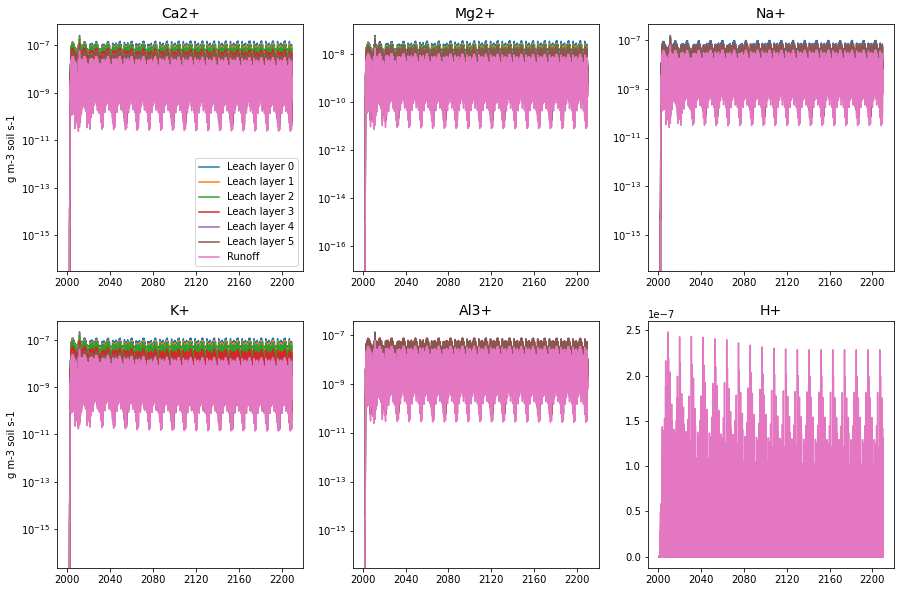

In [15]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'cation_leached_vr_{i+1}'][:, layer, 0], label = f'Leach layer {layer}')
    ax.plot(tvec, hr[f'cation_runoff'][:, i, 0], label = f'Runoff')
    if i == 0:
        ax.legend()
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
    ax.set_yscale('log')
ax = axes.flat[5]
for layer in range(6):
    ax.plot(tvec, hr['proton_leached_vr'][:, layer, 0])
ax.plot(tvec, hr['proton_runoff_vr'][:, 0])
ax.set_title('H+')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'H+')

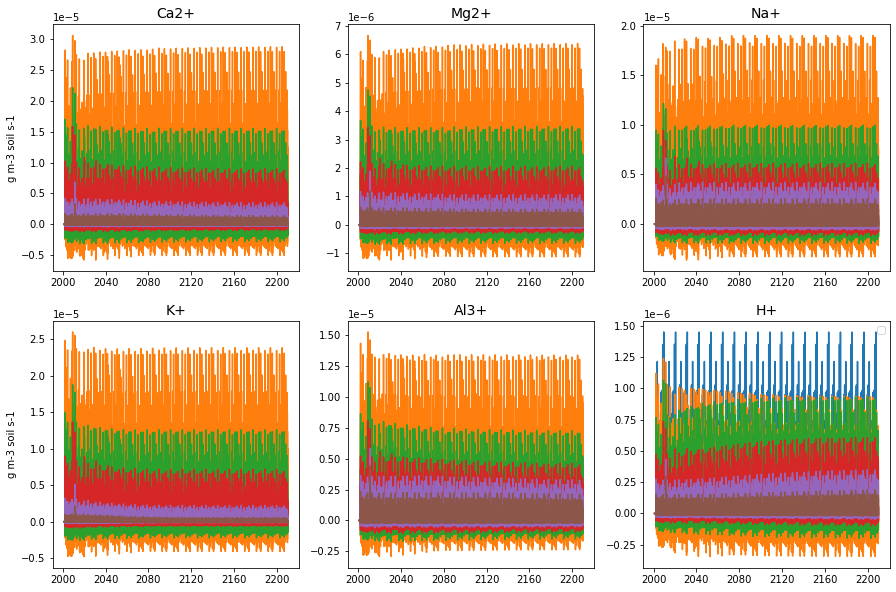

In [16]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'cation_infl_vr_{i+1}'][:, layer, 0], label = f'Leach layer {layer}')
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
ax = axes.flat[5]
for layer in range(6):
    ax.plot(tvec, hr['proton_infl_vr'][:, layer, 0])
ax.legend()
ax.set_title('H+')

Text(0.5, 1.0, 'H+')

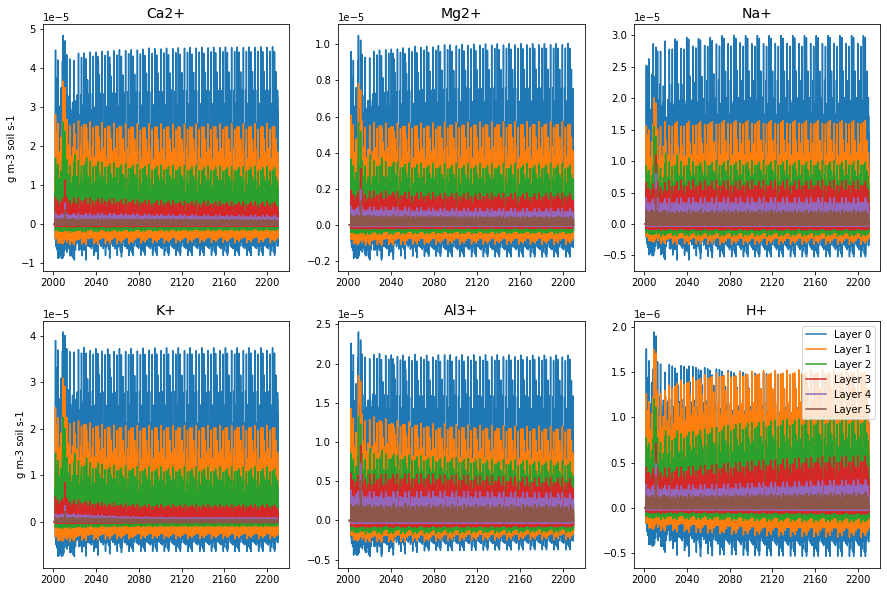

In [17]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'cation_oufl_vr_{i+1}'][:, layer, 0], label = f'layer {layer}')
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
ax = axes.flat[5]
for layer in range(6):
    ax.plot(tvec, hr['proton_oufl_vr'][:, layer, 0], label = f'Layer {layer}')
ax.legend()
ax.set_title('H+')

Text(0.5, 1.0, 'H+')

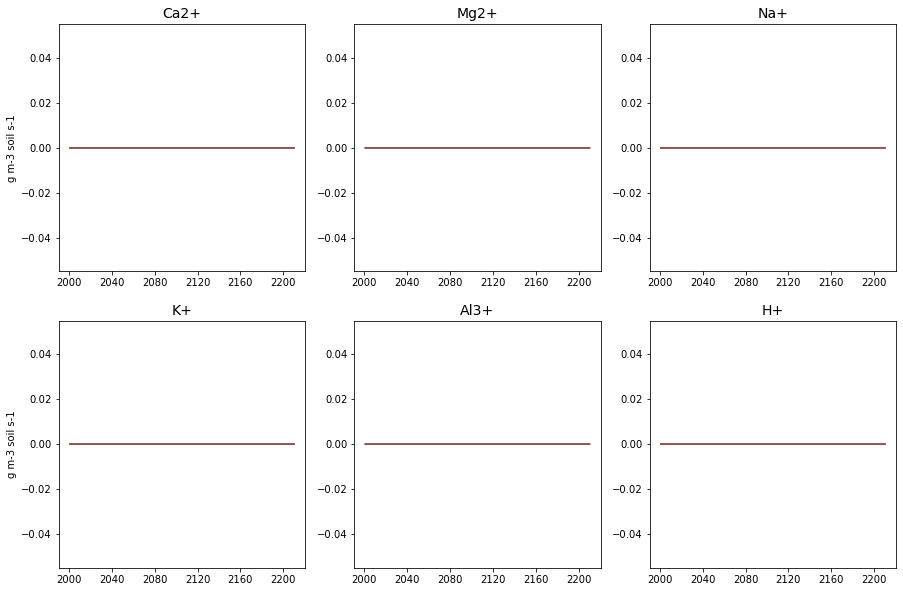

In [18]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'cation_uptake_vr_{i+1}'][:, layer, 0], label = f'Leach layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
ax = axes.flat[5]
for layer in range(6):
    ax.plot(tvec, hr['proton_uptake_vr'][:, layer, 0])
ax.set_title('H+')

## 6. soil pH and cation concentration in soil pore water

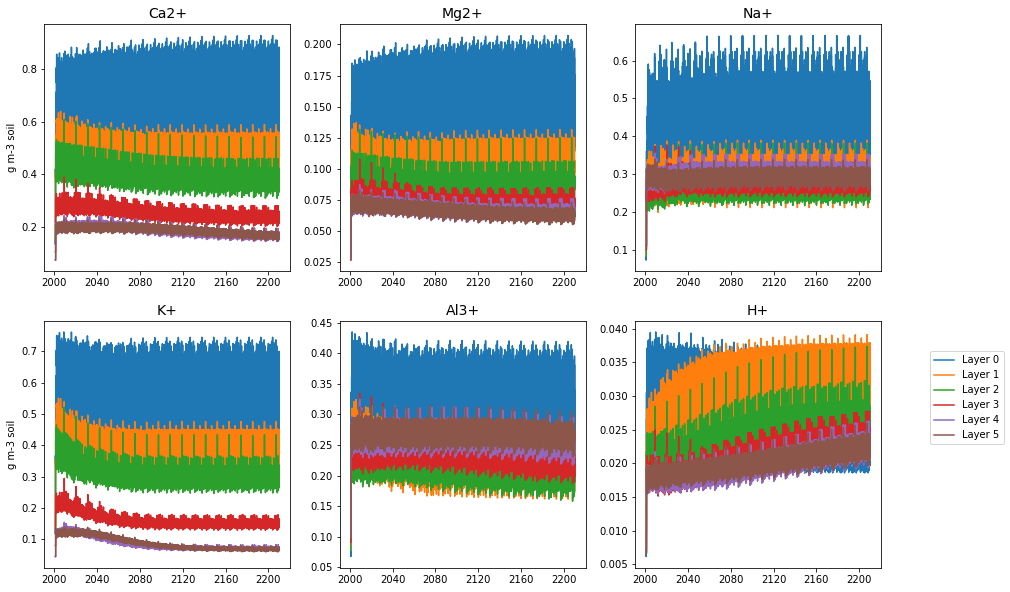

In [19]:
# In terms of g/m3 soil

fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'cation_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
ax = axes.flat[5]
for layer in range(6):
    ax.plot(tvec, hr[f'proton_vr'][:, layer, 0], label = f'Layer {layer}')
    # convert from g m-3 soil to mol kg-1 water
    #ax.plot(tvec, hr[f'proton_vr'][:,layer,0]*1e-3/hr['H2OSOI'][:,layer,0], 
    #        label = f'Layer {layer}')
    ax.set_title('H+')
ax.legend(loc = (1.2,0.5))

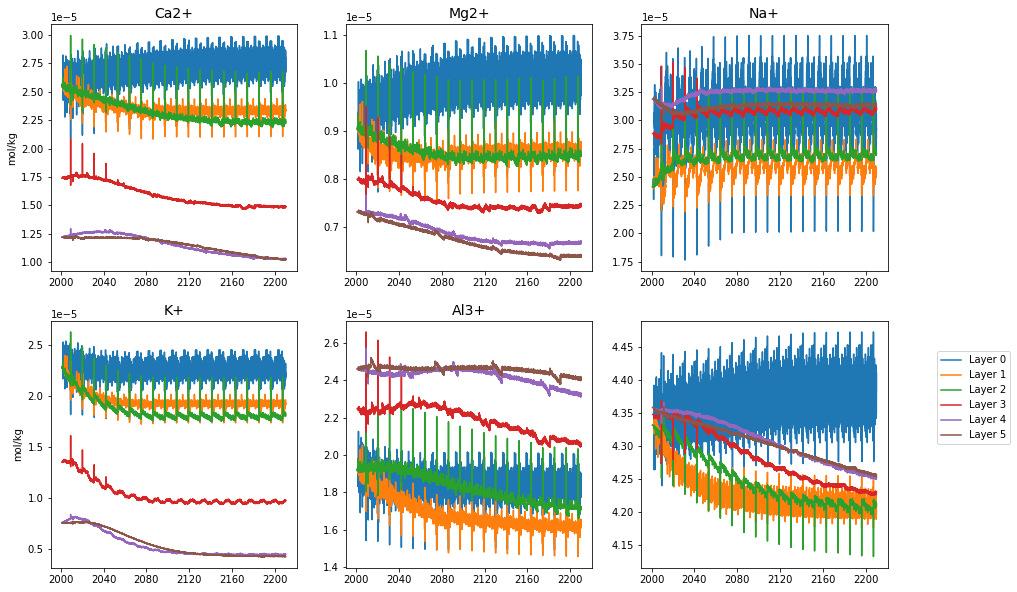

In [20]:
# in terms of mol/kg
mass_cation = [40.078, 24.305, 22.99, 39.0983, 26.98]

fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'cation_vr_{i+1}'][:, layer, 0]*1e-3/mass_cation[i]/ \
                hr['H2OSOI'][:,layer,0], label = f'Layer {layer}')
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('mol/kg')
ax = axes.flat[5]
for layer in range(6):
    ax.plot(tvec, hr[f'soil_pH'][:, layer, 0], label = f'Layer {layer}')
ax.set_title('soil pH')
    # convert from g m-3 soil to mol kg-1 water
    #ax.plot(tvec, hr[f'proton_vr'][:,layer,0]*1e-3/hr['H2OSOI'][:,layer,0], 
    #        label = f'Layer {layer}')
ax.legend(loc = (1.2,0.5))

(0.0, 1.0, 0.0, 1.0)

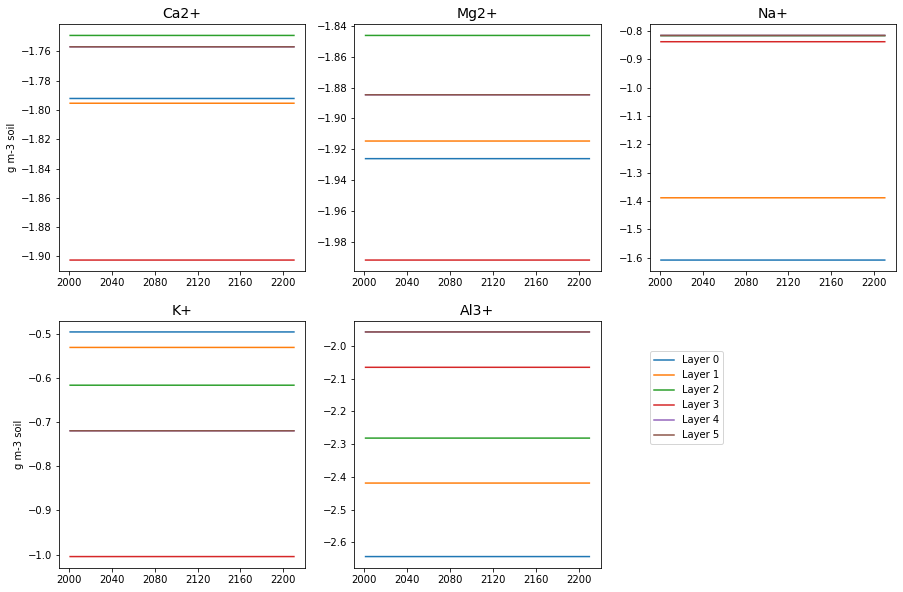

In [21]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'log_km_col_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
axes.flat[-1].axis('off')

## 8. Omega values

(0.0, 1.0, 0.0, 1.0)

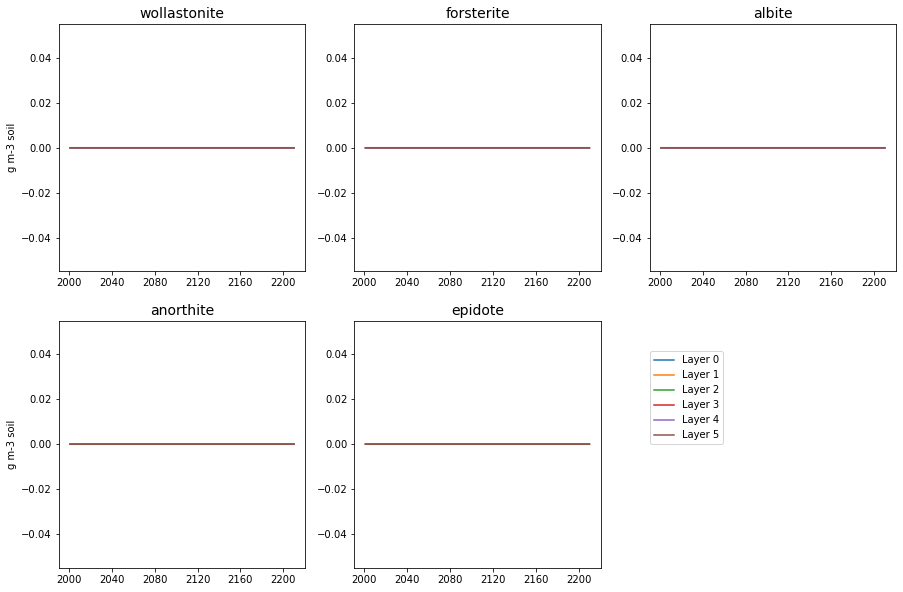

In [22]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['wollastonite', 'forsterite', 'albite', 'anorthite', 'epidote']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'log_omega_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
axes.flat[-1].axis('off')

## 9. Net cation fluxes in/out of the solution

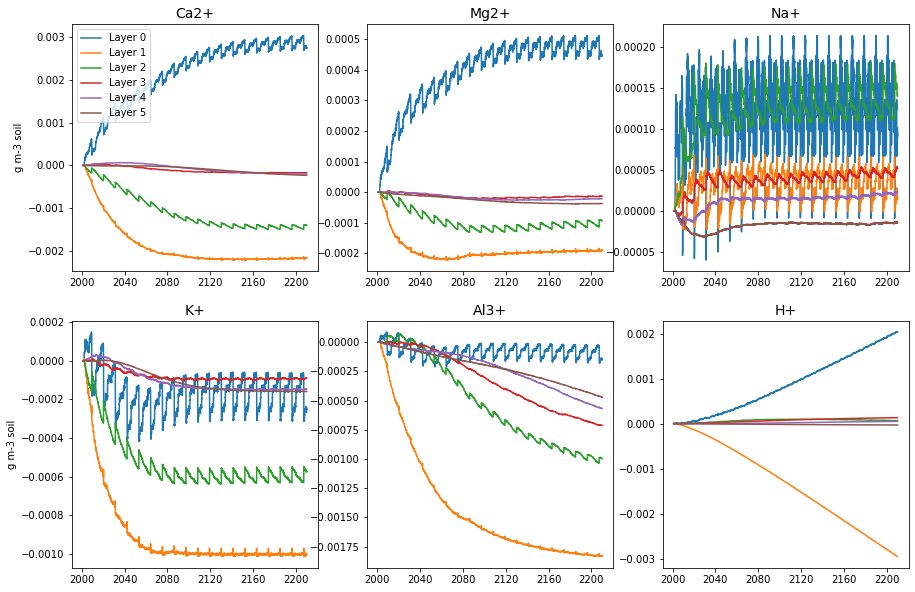

In [23]:
# Skip the CEC-related flux (redistribution flux)
# Thus gives the total balance of the solution and 
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        tot = hr[f'background_weathering_vr_{i+1}'][:,layer,0].values + \
            hr[f'primary_cation_flux_vr_{i+1}'][:,layer,0].values + \
            hr[f'cation_infl_vr_{i+1}'][:,layer,0].values - \
            hr[f'cation_oufl_vr_{i+1}'][:,layer,0].values - \
            hr[f'cation_uptake_vr_{i+1}'][:,layer,0].values - \
            hr[f'cation_leached_vr_{i+1}'][:,layer,0].values - \
            hr[f'cation_runoff_vr_{i+1}'][:,layer,0].values
            # hr[f'cec_cation_flux_vr_{i+1}'][:,layer,0].values + \
        s = pd.Series(tot, index = tvec)
        s = s.cumsum()
        ax.plot(tvec, s, label = f'Layer {layer}')
    if i == 0:
        ax.legend()
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
ax = axes.flat[-1]
for layer in range(6):
    tot = - hr['primary_proton_flux_vr'][:,layer,0].values + \
        hr['proton_infl_vr'][:,layer,0].values - \
        hr['proton_oufl_vr'][:,layer,0].values - \
        hr['proton_uptake_vr'][:,layer,0].values - \
        hr['proton_leached_vr'][:,layer,0].values - \
        hr['proton_runoff_vr'][:,layer,0].values
        # hr['cec_proton_flux_vr'][:,layer,0].values + \
    s = pd.Series(tot, index = tvec)
    s = s.cumsum()
    ax.plot(tvec, s, label = f'Layer {layer}')
ax.set_title('H+')
fig.savefig('total_cation_flux_vr_rolling.png', dpi = 600)

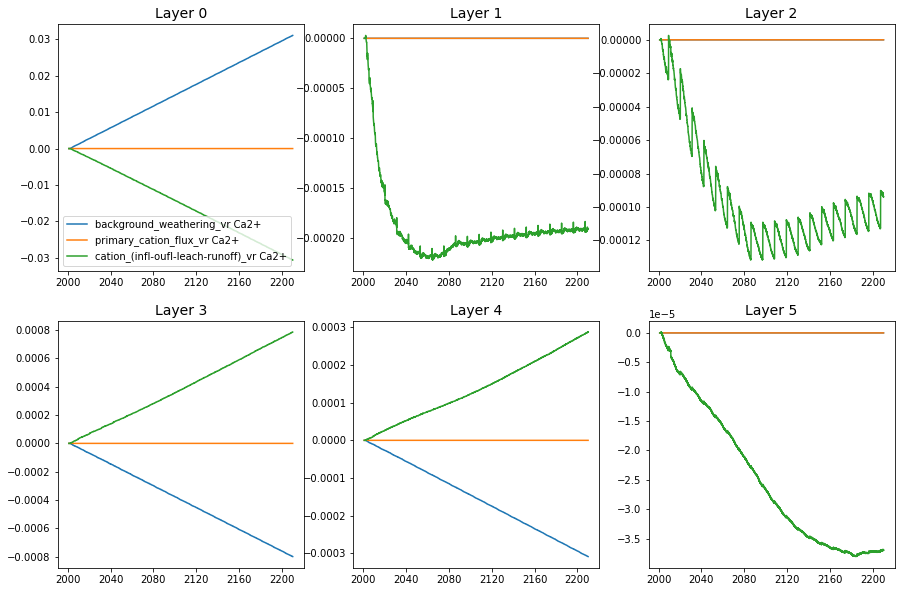

In [24]:
# individual terms in the cation balance
i = 1 
cation = 'Ca2+'

fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for layer in range(6):
    ax = axes.flat[layer]
    s = pd.Series(hr[f'background_weathering_vr_{i+1}'][:,layer,0].values, 
                  index = tvec).cumsum()
    ax.plot(tvec, s, label = f'background_weathering_vr {cation}')

    s = pd.Series(hr[f'primary_cation_flux_vr_{i+1}'][:,layer,0].values, 
                  index = tvec).cumsum()
    ax.plot(tvec, s, label = f'primary_cation_flux_vr {cation}')

    s = pd.Series(hr[f'cation_infl_vr_{i+1}'][:,layer,0].values - 
                  hr[f'cation_oufl_vr_{i+1}'][:,layer,0].values - 
                  hr[f'cation_leached_vr_{i+1}'][:,layer,0].values - 
                  hr[f'cation_runoff_vr_{i+1}'][:,layer,0].values, 
                  index = tvec).cumsum()
    ax.plot(tvec, s, label = f'cation_(infl-oufl-leach-runoff)_vr {cation}')

    #s = pd.Series(- hr[f'cation_uptake_vr_{i+1}'][:,layer,0].values, 
    #              index = tvec).cumsum()
    #ax.plot(tvec, s, label = f'cation_uptake_vr {cation}')

    if layer == 0:
        ax.legend()
    ax.set_title(f'Layer {layer}')
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')

fig.savefig('total_proton_flux_vr_rolling.png', dpi = 600)

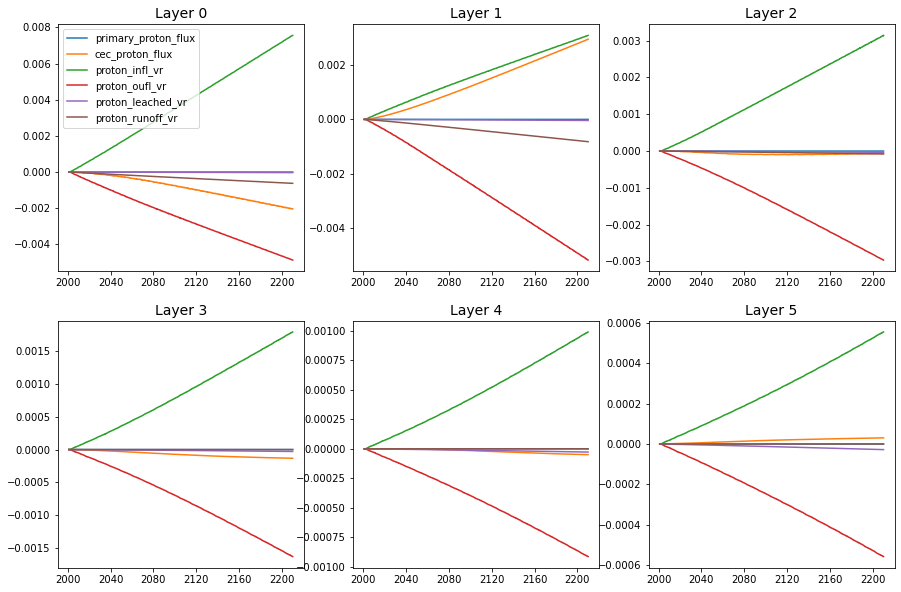

In [25]:
# individual terms in the H+ balance
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for layer in range(6):
    ax = axes.flat[layer]
    s = pd.Series(- hr['primary_proton_flux_vr'][:,layer,0].values, 
                  index = tvec).cumsum()
    ax.plot(tvec, s, label = 'primary_proton_flux')

    s = pd.Series(hr['cec_proton_flux_vr'][:,layer,0].values, 
                  index = tvec).cumsum()
    ax.plot(tvec, s, label = 'cec_proton_flux')

    s = pd.Series(hr['proton_infl_vr'][:,layer,0].values, 
                  index = tvec).cumsum()
    ax.plot(tvec, s, label = 'proton_infl_vr')

    s = pd.Series(- hr['proton_oufl_vr'][:,layer,0].values, 
                  index = tvec).cumsum()
    ax.plot(tvec, s, label = 'proton_oufl_vr')

    #s = pd.Series(- hr['proton_uptake_vr'][:,layer,0].values, 
    #              index = tvec).cumsum()
    #ax.plot(tvec, s, label = 'proton_uptake_vr')

    s = pd.Series(- hr['proton_leached_vr'][:,layer,0].values, 
                  index = tvec).cumsum()
    ax.plot(tvec, s, label = 'proton_leached_vr')

    s = pd.Series(- hr['proton_runoff_vr'][:,layer,0].values, 
                  index = tvec).cumsum()
    ax.plot(tvec, s, label = 'proton_runoff_vr')

    if layer == 0:
        ax.legend()
    ax.set_title(f'Layer {layer}')
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')

fig.savefig('total_proton_flux_vr_rolling.png', dpi = 600)

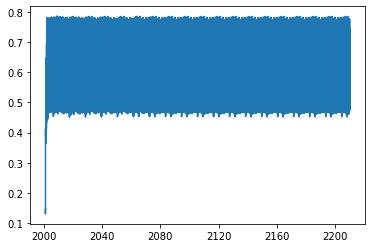

In [26]:
plt.plot(tvec, hr['H2OSOI'][:, 0, 0].values)

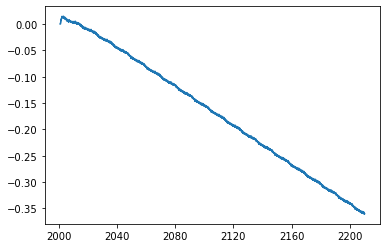

In [27]:
# individual terms in the infiltration balance
s = pd.Series(hr['QIN'][:, 0, 0].values - hr['QOUT'][:, 9, 0].values - \
              hr['QOVER'][:, 0].values - hr['QDRAI'][:, 0].values - \
              hr['QLFX_ROOTSOI'][:, :, 0].sum(axis = 1).values, 
              index = tvec).cumsum()
plt.plot(tvec, s)

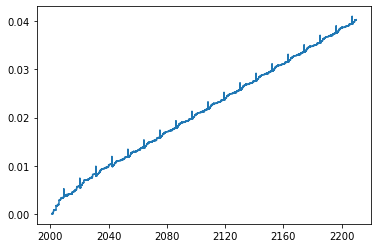

In [28]:
# individual terms in the infiltration balance
s = pd.Series(hr['QIN'][:, 1, 0].values - hr['QOUT'][:, 1, 0].values - \
              hr['QLFX_ROOTSOI'][:, 1, 0], 
              index = tvec).cumsum()
plt.plot(tvec, s)

In [29]:
#hr.close()